#  PRACTICE3 - K-MEANS IMAGE SEGMENTATION


# Phân Đoạn Ảnh Sử Dụng K-Means Clustering



### Thư viện sử dụng
- `cv2` (OpenCV): Xử lý ảnh.
- `numpy`: Hỗ trợ các thao tác trên mảng.
- `matplotlib.pyplot`: Hiển thị hình ảnh.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Bước 1: Đọc file ảnh đầu vào


In [2]:
image = cv2.imread("Ninh_binh_viet_nam.jpg")

- `cv2.imread`: Đọc ảnh từ tệp với định dạng mặc định là BGR (Blue-Green-Red).

# Bước 2: Chuyển đổi không gian màu

In [3]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

- `v2.cvtColor`: Chuyển đổi ảnh từ không gian màu BGR sang RGB để hiển thị chính xác với matplotlib.

# Bước 3: Thay đổi kích thước ảnh

In [4]:
image_resized = cv2.resize(image_rgb, (300, 300))

- Ảnh được thay đổi kích thước xuống 300x300 pixel để giảm độ phức tạp khi xử lý.

# Bước 4: Chuyển đổi ảnh thành mảng 2D

In [5]:
#chuyển đổi ảnh thành mảng 2D của các pixel và 3 giái trị của màu (RGB)
pixel_values = image_resized.reshape((-1, 3))

#chuyển đổi sang float
pixel_values = np.float32(pixel_values) 

- `reshape((-1, 3))`: Mỗi pixel được đại diện bởi một vector với 3 giá trị màu (R, G, B).


- `np.float32`: Chuyển các giá trị pixel sang kiểu số thực (float32) để xử lý.

# Bước 5: Thiết lập thuật toán K-Means

In [6]:
#xác định tiêu chí dừng
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

#số cụm k
K = 3 #<-- thay đổi số k

Tiêu chí dừng (criteria):

- `cv2.TERM_CRITERIA_EPS`: Dừng khi sự thay đổi giữa các lần lặp nhỏ hơn một ngưỡng.

- `cv2.TERM_CRITERIA_MAX_ITER`: Dừng sau số lần lặp tối đa (100).

- `0.2`: Ngưỡng epsilon.

- Số cụm (K): Ảnh được chia thành 3 cụm màu.

# Bước 6: Áp dụng thuật toán K-Means

In [7]:
_, labels, centers = cv2.kmeans(pixel_values, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

Đầu ra:

-`_`: Tổng lỗi bình phương (không dùng).

- `labels`: Mỗi pixel được gán nhãn tương ứng với cụm của nó.

- `centers`: Các tâm cụm (giá trị màu trung bình).

# Bước 7: Chuyển đổi lại ảnh

In [8]:
#chuyển đổi giá trị 8 bit
centers = np.uint8(centers)

#gán màu của tâm cụm cho từng pixel
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image_resized.shape)

- `np.uint8`: Chuyển tâm cụm về dạng số nguyên 8 bit để biểu diễn màu.

- `segmented_image`: Tạo lại ảnh từ các tâm cụm, nơi mỗi pixel mang màu của cụm tương ứng.

# Bước 8: Hiển thị kết quả

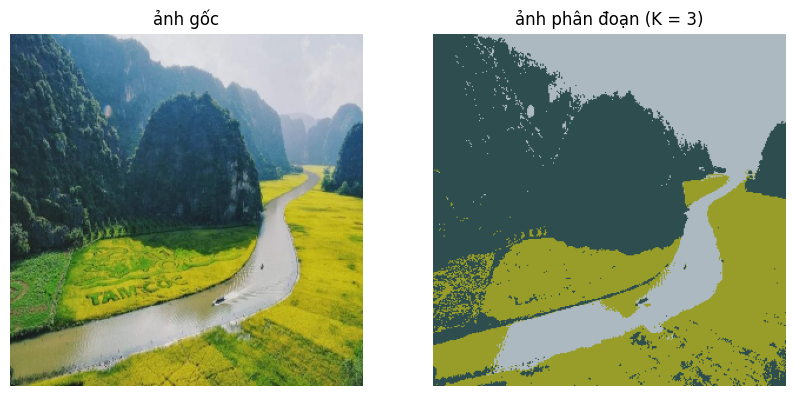

In [9]:
#hiển thị màn hình kết quả
plt.figure(figsize=(10, 5))

#ảnh gốc downsize pixel
plt.subplot(1, 2, 1)
plt.title("ảnh gốc")
plt.imshow(image_resized)
plt.axis("off")


#ảnh phân đoạn
plt.subplot(1, 2, 2)
plt.title(f"ảnh phân đoạn (K = {K})")
plt.imshow(segmented_image)
plt.axis("off")


#hiện lên 
plt.show()

- Hiển thị hai ảnh:

- Ảnh gốc (sau khi resize).

- Ảnh phân đoạn với K cụm màu.

- Kết quả:

- Ảnh gốc: Giữ nguyên các màu sắc ban đầu.

- Ảnh phân đoạn: Các màu của ảnh được chia thành K cụm, mỗi cụm đại diện bởi một giá trị màu trung bình.

# note:

- Thay đổi giá trị K để quan sát cách số lượng cụm ảnh hưởng đến kết quả phân đoạn.
- Đảm bảo file ảnh `"Ninh_binh_viet_nam.jpg"` tồn tại trong thư mục làm việc.

- sourcecode github: https://github.com/HUyEsona/K-MEANS-IMAGE-SEGMENTATION.git